In [1]:
import os

import cv2
import matplotlib.pyplot as plt

import mublayout3d as ml3

Segmentation Models: using `keras` framework.


In [2]:
# Declare the necessary constants
INPUT_PATH  = 'examples/Drawing1.jpg'
OUTPUT_PATH = ''
WALL_HEIGHT = 100
FLOOR_DEPTH = 10

In [3]:
# Declare the save paths for the meshes
filename = '.'.join(os.path.basename(INPUT_PATH).split('.')[:-1])
wall_mesh_path = os.path.join(OUTPUT_PATH, f'walls_{filename}.obj')
door_mesh_path = os.path.join(OUTPUT_PATH, f'doors_{filename}.obj')
combined_mesh_path = os.path.join(OUTPUT_PATH, f'model_{filename}.obj')

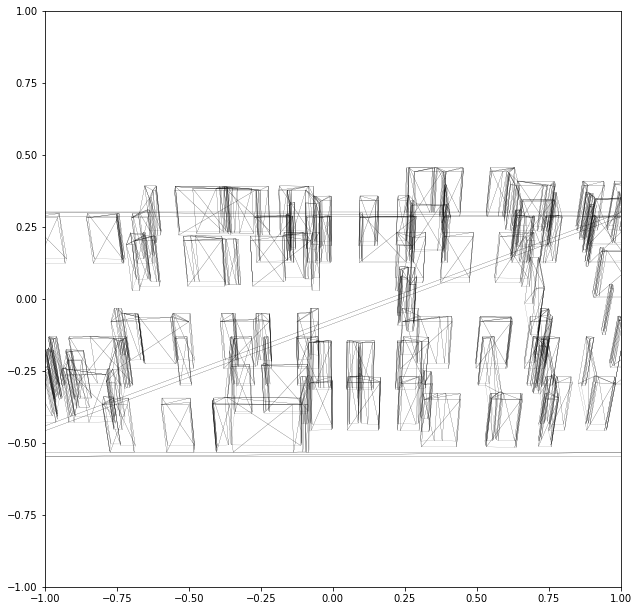

In [4]:
#######################################################################
### This section displays the predicted wall mesh in wireframe view ###
#######################################################################

image = cv2.imread(INPUT_PATH)
prediction = ml3.WallDetector().predict(image)

ret, thresh = cv2.threshold(prediction, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

mesh = ml3.build_wall_mesh(contours, WALL_HEIGHT, FLOOR_DEPTH)
mesh.visualize()
mesh.save_as_obj(wall_mesh_path)

Using cache found in C:\Users\Adrian/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-4 Python-3.10.4 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6144MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


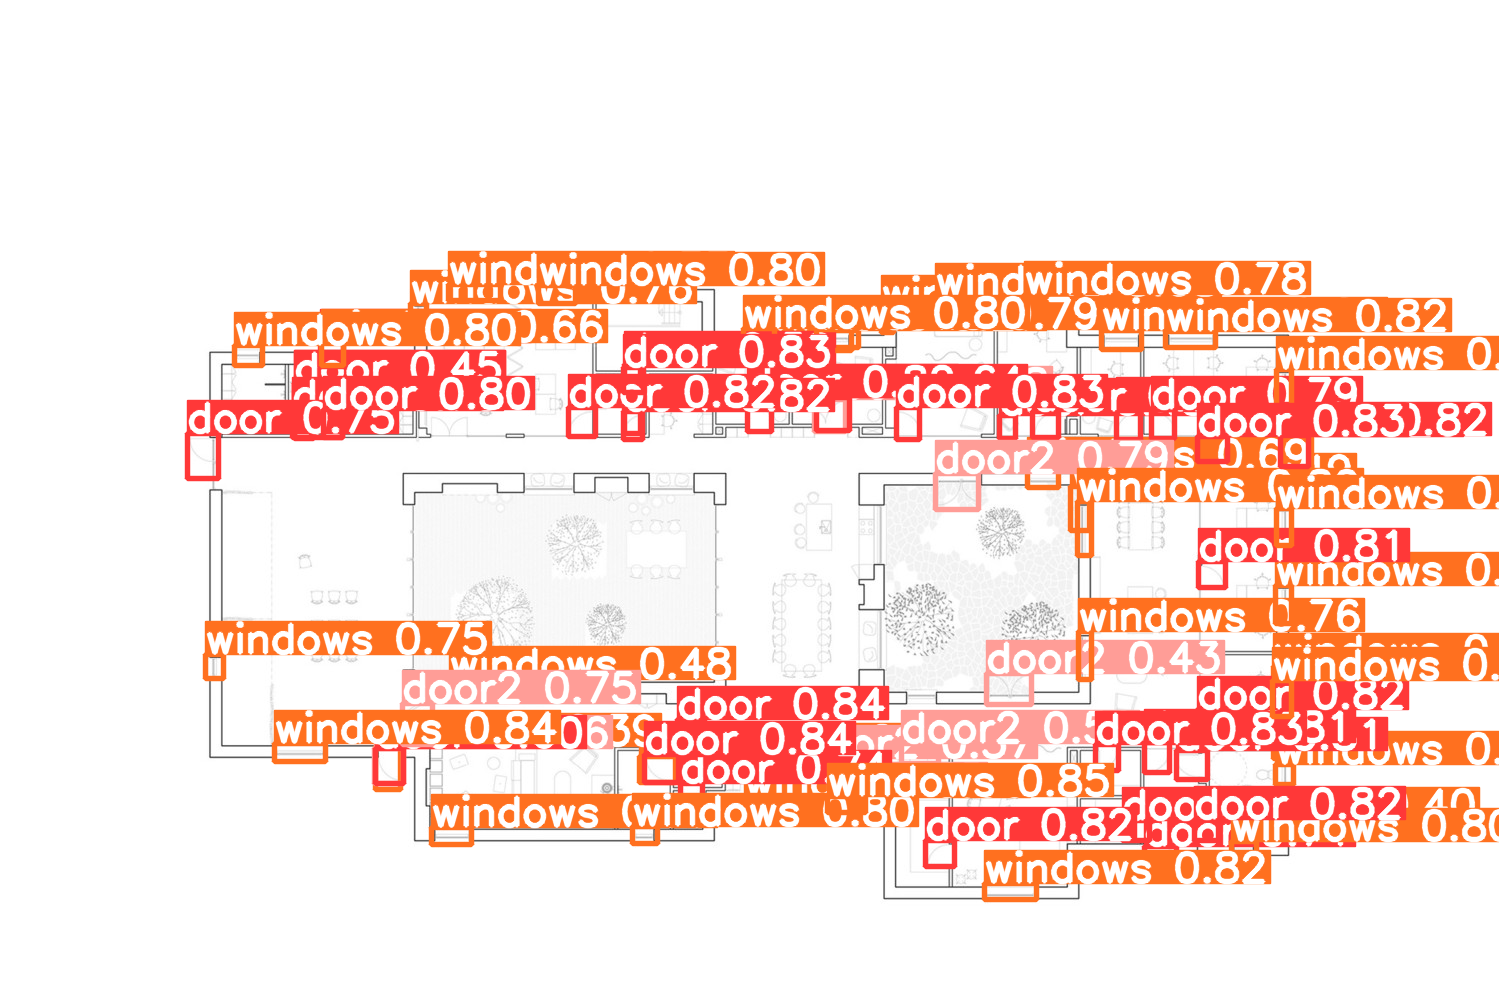

In [5]:
###################################################################
### This section displays the results of object detection model ###
###################################################################

results = ml3.OpeningsDetector().predict(image)
results.show()

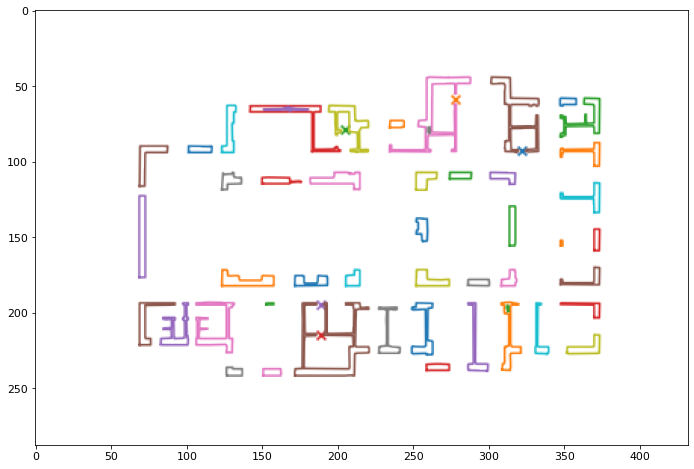

In [6]:
#################################################################################################################
### This section displays the intersection points (crosses) between the walls and the detected bounding boxes ###
#################################################################################################################

intersections = ml3.get_intersections(results, contours, save_path=OUTPUT_PATH)
image = plt.imread(os.path.join(OUTPUT_PATH, 'intersections.png'))
plt.figure(figsize=(12, 8))
_ = plt.imshow(image)

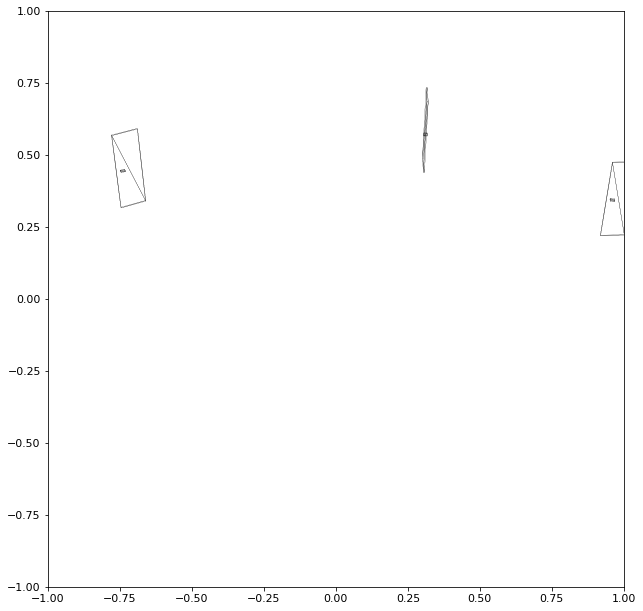

In [7]:
#############################################################
### This section displays the door mesh in wireframe view ###
#############################################################

door_mesh = ml3.build_door_mesh(intersections, WALL_HEIGHT)
door_mesh.save_as_obj(door_mesh_path)
door_mesh.visualize()

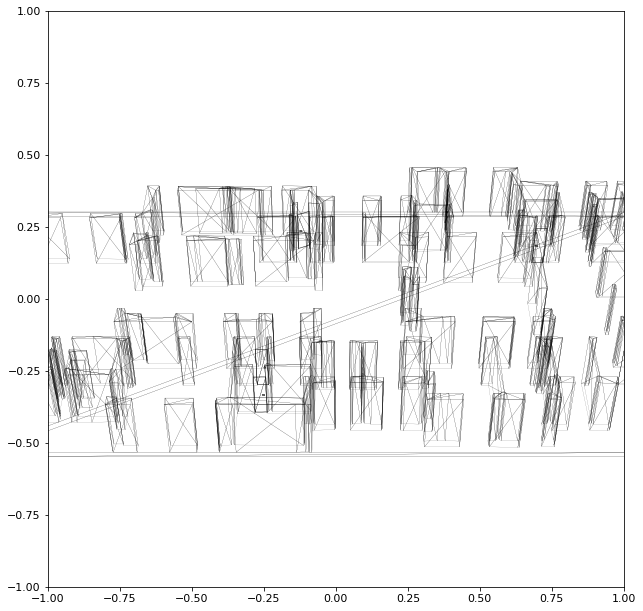

In [8]:
#################################################################
### This section displays the combined mesh in wireframe view ###
#################################################################

combined_mesh = ml3.combine_mesh(wall_mesh_path, door_mesh_path)
combined_mesh.save_as_obj(combined_mesh_path)
combined_mesh.visualize()